In [143]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import interact
from ml_collections import ConfigDict
from models.ETD_KT_CM_JAX_Vectorised import *
from filters import resamplers
from filters.filter import ParticleFilter
from jax.config import config
config.update("jax_enable_x64", True)

In [144]:
signal_params = ConfigDict(KDV_params_2)
print(signal_params)

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 1
S: 0
c_0: 0
c_1: 1
c_2: 0.0
c_3: 2.0e-05
c_4: 0.0
dt: 0.001
equation_name: KdV
initial_condition: gaussian
method: Dealiased_SETDRK4
nx: 256
sigma: 0.0
tmax: 1
xmax: 1
xmin: 0



Next, we specify a signal, by choosing a deterministic solver, 

In [145]:
signal_params.update(E=1,method='Dealiased_ETDRK4',nx = 256*2,P=0,S=0,nmax=256*4,tmax=1,initial_condition='gaussian')


Now we continue to define a stochastic ensemble

Now we specify the models, by calling the class.

In [146]:
signal_model = ETD_KT_CM_JAX_Vectorised(signal_params)

initial_signal = initial_condition(signal_model.x, signal_params.E, signal_params.initial_condition)

In [147]:
final, all = signal_model.run(initial_signal, signal_model.nmax,None) #the final input is scan length? 

In [148]:
print(type(all))
print(len(all))
print(all[0].shape) # particles
print(all[1].shape) # signal
#out shape is (n_total, n_particles, n_dim)

<class 'jaxlib.xla_extension.ArrayImpl'>
1000
(1, 512)
(1, 512)


In [149]:
print(initial_signal.shape)
print(all.shape)
signal = jnp.concatenate([initial_signal[None,...], all], axis=0)


(1, 512)
(1000, 1, 512)


In [150]:
def plot(da_step):
    plt.plot(signal_model.x, signal[da_step,0,:], color='k')
    plt.legend(['signal'])
    plt.show()

interact(plot, da_step=(0, signal_model.nmax))

interactive(children=(IntSlider(value=500, description='da_step', max=1000), Output()), _dom_classes=('widget-…

<function __main__.plot(da_step)>

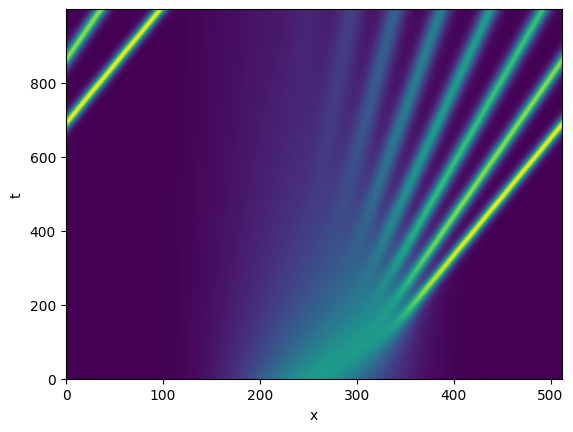

In [151]:
plt.imshow(all[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

(1001, 1, 512)


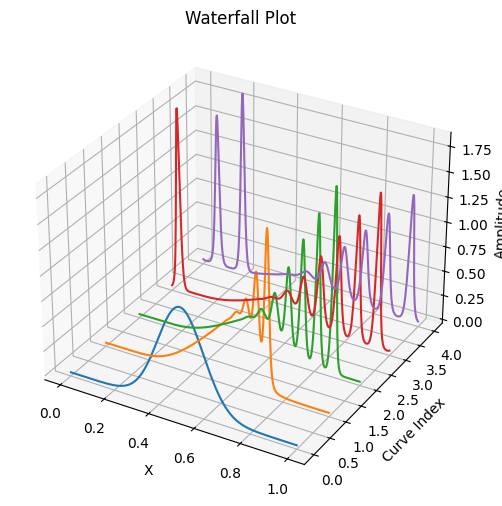

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_waterfall(x_axis, data, num_lines=None):
    """
    Creates a 3D waterfall plot from a 2D NumPy array.
    
    Parameters:
        data (ndarray): 2D array of shape (N, M), where:
                        - N: number of curves
                        - M: number of points per curve
        num_lines (int, optional): Number of curves to plot. If None, plots all.
    """
    N, E, M = data.shape  # Get dimensions
    print(data.shape)
    x = x_axis

    # Determine which rows to plot
    if num_lines is None or num_lines >= N:
        indices = np.arange(N)
    else:
        indices = np.linspace(0, N - 1, num_lines, dtype=int)

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot selected curves with an offset
    for i, idx in enumerate(indices):
        ax.plot(x, np.full_like(x, i), data[idx,0, :], label=f'Curve {idx}' if i % 5 == 0 else '',c='k')

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Curve Index')
    ax.set_zlabel('Amplitude')
    ax.set_title('Waterfall Plot')

    plt.show()

N, M = 50, 100  # 50 curves, 100 points each
data = np.sin(np.linspace(0, 10, M)) * np.exp(-0.05 * np.arange(N)[:, None])  # Example data

# Call the function with a specified number of lines
plot_waterfall(signal_model.x,signal, num_lines=5)


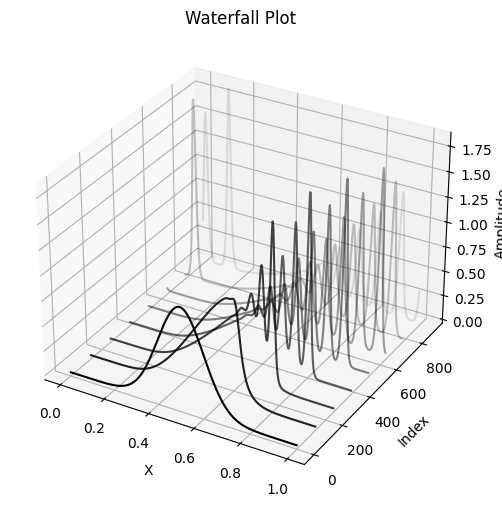

In [ ]:


# Sample Data: 2D array of shape (N, M)
data = signal # Sample Y values with decay
x=signal_model.x
# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
N=signal_model.nmax
# Plot each row as a separate line with an offset
for i in range(N):
    if i%128==0:
        ax.plot(x, np.full_like(x, i), data[i, 0, :], label=f'Curve {i}' if i % 128 == 0 else '', alpha=1-i/N,c='k')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Index')
ax.set_zlabel('Amplitude')
ax.set_title('Waterfall Plot')

plt.show()